# Data preprocessing

In [1]:
#loading libraries
import pandas as pd
import numpy as np
import seaborn as sb
import missingno as msno
import matplotlib.pyplot as plt
data = pd .read_csv("melb_data.csv") #load the dataset
data.head(5)                                     #Top five rows will be printed from dataset to understand it

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,03-12-2016,2.5,3067,...,1,1.0,202,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,04-02-2016,2.5,3067,...,1,0.0,156,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,04-03-2017,2.5,3067,...,2,0.0,134,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,04-03-2017,2.5,3067,...,2,1.0,94,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,04-06-2016,2.5,3067,...,1,2.0,120,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019


In [2]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  int64  
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  int64  
 10  Bedroom2       13580 non-null  int64  
 11  Bathroom       13580 non-null  int64  
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  int64  
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [4]:
data.nunique()                # This will give how many unique values are there in every column

Suburb             314
Address          13378
Rooms                9
Type                 3
Price             2204
Method               5
SellerG            268
Date                58
Distance           202
Postcode           198
Bedroom2            12
Bathroom             9
Car                 11
Landsize          1448
BuildingArea       602
YearBuilt          144
CouncilArea         33
Lattitude         6503
Longtitude        7063
Regionname           8
Propertycount      311
dtype: int64

In [5]:
data.isnull().sum()       # This will check for null values in dataset

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [6]:
df = data.dropna(axis = 0, how = 'any')
df.isnull().sum()             #this will remove all the null values

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [7]:
df.to_csv('melb_clean.csv')
df = pd .read_csv("melb_clean.csv")
df.head(5)

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,04-02-2016,2.5,...,1,0.0,156,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
1,2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,04-03-2017,2.5,...,2,0.0,134,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019
2,4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,04-06-2016,2.5,...,1,2.0,120,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019
3,6,Abbotsford,124 Yarra St,3,h,1876000,S,Nelson,07-05-2016,2.5,...,2,0.0,245,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019
4,7,Abbotsford,98 Charles St,2,h,1636000,S,Nelson,08-10-2016,2.5,...,1,2.0,256,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019


# EDA: Exploratory Data Analysis

<AxesSubplot:>

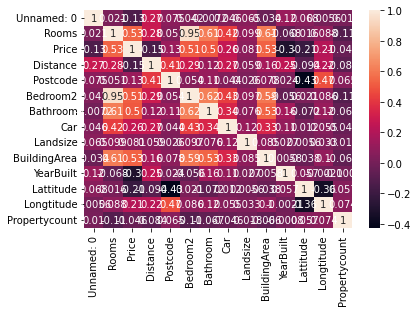

In [8]:
# This is the correlation matrix which tells relations between different features in the dataset.
corela = df.corr()
sb.heatmap(corela, xticklabels = corela.columns , yticklabels = corela.columns , annot = True)

In [9]:
# Columns to drop -> Suburb Address SellerG Date
df.drop("Suburb", axis=1, inplace=True)
df.drop("Address", axis=1, inplace=True)
df.drop("SellerG", axis=1, inplace=True)
df.drop("Date", axis=1, inplace=True)
# Too much outliers. I cant fill the values without corrupt the data.
df.drop("BuildingArea", axis=1, inplace=True)
df.drop("YearBuilt", axis=1, inplace=True)
df.drop("Unnamed: 0", axis=1, inplace=True)

In [10]:
df.head(5)

,Rooms,Type,Price,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,2,h,1035000,S,2.5,3067,2,1,0.0,156,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
1,3,h,1465000,SP,2.5,3067,3,2,0.0,134,Yarra,-37.8093,144.9944,Northern Metropolitan,4019
2,4,h,1600000,VB,2.5,3067,3,1,2.0,120,Yarra,-37.8072,144.9941,Northern Metropolitan,4019
3,3,h,1876000,S,2.5,3067,4,2,0.0,245,Yarra,-37.8024,144.9993,Northern Metropolitan,4019
4,2,h,1636000,S,2.5,3067,2,1,2.0,256,Yarra,-37.8060,144.9954,Northern Metropolitan,4019


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
                        ("std_scaler", StandardScaler())
                        ])
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
num_atr = ['Rooms', 'Distance', 'Postcode', 'Bedroom2',
           'Bathroom', 'Car', 'Landsize', 'Lattitude',
           'Longtitude','Propertycount']
cat_atr = ["Type", "Method", "CouncilArea", "Regionname"]
full_pipeline = ColumnTransformer([
                                  ("num", num_pipeline, num_atr),
                                  ("cat", OneHotEncoder(), cat_atr),
                                  ])
X_trainp = full_pipeline.fit_transform(X_train)

In [11]:
df.head(1)

,Rooms,Type,Price,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,2,h,1035000,S,2.5,3067,2,1,0.0,156,Yarra,-37.8079,144.9934,Northern Metropolitan,4019


In [12]:
from sklearn.preprocessing import LabelEncoder
le_type = LabelEncoder()
le_method = LabelEncoder()
le_councilarea = LabelEncoder()
le_regionname = LabelEncoder()

df['Type'] = le_type.fit_transform(df['Type'])
df['Method'] = le_method.fit_transform(df['Method'])
df['CouncilArea'] = le_councilarea.fit_transform(df['CouncilArea'])
df['Regionname'] = le_regionname.fit_transform(df['Regionname'])
df.head(2)

,Rooms,Type,Price,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,2,0,1035000,1,2.5,3067,2,1,0.0,156,29,-37.8079,144.9934,2,4019
1,3,0,1465000,3,2.5,3067,3,2,0.0,134,29,-37.8093,144.9944,2,4019


In [13]:
y = df["Price"]
df.drop("Price", axis=1, inplace=True)
X = df
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=4)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4337, 14)
(1859, 14)
(4337,)
(1859,)


## Model Approaches

In [14]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
forest_prediction = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, forest_prediction)
forest_rmse = np.sqrt(forest_mse)
print(forest_rmse)
r2_score(y_test, forest_prediction)

326133.1177177238


0.7410996807347495

In [15]:
from sklearn.svm import SVR
svr_reg = SVR()
svr_reg.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
svr_prediction = svr_reg.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_prediction)
svr_rmse = np.sqrt(svr_mse)
print(svr_rmse)

668119.0574993239


1. KNN: K - Nearest Neighbours

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn_reg = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_reg.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
knn_pred = knn_reg.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_pred)
knn_rmse = np.sqrt(knn_mse)
print(knn_rmse)

631605.9169058575


2. Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svm_reg = SVC(kernel = 'linear', random_state = 0)
svm_reg.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
svm_pred = svm_reg.predict(X_test)
svm_mse = mean_squared_error(y_test, svm_pred)
svm_rmse = np.sqrt(svm_mse)
print(svm_rmse)

4. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_reg = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_reg.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
dt_pred = dt_reg.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_rmse = np.sqrt(dt_mse)
print(dt_rmse)

5. Random forest

6. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lg_reg = LogisticRegression(random_state = 0)
lg_reg.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
lg_pred = lg_reg.predict(X_test)
lg_mse = mean_squared_error(y_test, lg_pred)
lg_rmse = np.sqrt(lg_mse)
print(lg_rmse)

7. Stochastic Gradient Decent

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_reg = SGDClassifier(loss = 'modified_huber', shuffle = True, random_state = 101)
sgd_reg.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
sgd_pred = sgd_reg.predict(X_test)
sgd_mse = mean_squared_error(y_test, sgd_pred)
sgd_rmse = np.sqrt(sgd_mse)
print(sgd_rmse)

In [15]:
df.head(2)

,Rooms,Type,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,2,0,1,2.5,3067,2,1,0.0,156,29,-37.8079,144.9934,2,4019
1,3,0,3,2.5,3067,3,2,0.0,134,29,-37.8093,144.9944,2,4019


In [16]:
df.describe()

,Rooms,Type,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,0.583280,1.437218,9.751097,3101.947708,2.902034,1.576340,1.573596,471.006940,14.678502,-37.807904,144.990201,3.824403,7435.489509
std,0.971079,0.853992,1.142938,5.612065,86.421604,0.970055,0.711362,0.929947,897.449881,9.217256,0.075850,0.099165,1.986514,4337.698917
min,1.000000,0.000000,0.000000,0.000000,3000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-38.164920,144.542370,0.000000,389.000000
25%,2.000000,0.000000,1.000000,5.900000,3044.000000,2.000000,1.000000,1.000000,152.000000,6.000000,-37.855438,144.926198,2.000000,4383.750000
50%,3.000000,0.000000,1.000000,9.000000,3081.000000,3.000000,1.000000,1.000000,373.000000,16.000000,-37.802250,144.995800,5.000000,6567.000000
75%,4.000000,1.000000,1.000000,12.400000,3147.000000,3.000000,2.000000,2.000000,628.000000,22.000000,-37.758200,145.052700,5.000000,10175.000000
max,8.000000,2.000000,4.000000,47.400000,3977.000000,9.000000,8.000000,10.000000,37000.000000,30.000000,-37.457090,145.526350,7.000000,21650.000000


In [ ]:
      print("Hello Sir!\nPlease Enter the details: \n")
      room = int(input("How many rooms do you have (1-8): " ))
      type = int(input("Propert Type (0-2): "))
      method = int(input("How you want to sell your property (0-4): "))
      distance = float(input("Enter your distance (0-47.4): "))
      postcode = int(input("Enter postcode (3000-3977): "))
      bedroom = int(input("\nEnter number of bedroom (0-9): "))
      bathroom = int(input("\nEnter number of bathroom (1-8): "))
      car = int(input("\nEnter number of cars (0-10): "))
      landsize = int(input("\nEnter landsize (0-37000): "))
      councilarea = int(input("\nEnter CounsilArea (0-30): "))
      lattitude = float(input("\nEnter lattitude (-38.164920 - -37.457090): "))
      longtitude = float(input("\nEnter longtitude (144.542370 - 145.526350): "))
      region = int(input("\nEnter region name (0-7): "))
      propertycount = int(input("\nEnter propertycount (389-21650): "))
    
      #Predicting...........................................................................
      print("\n\nPREDICTION.................................\n")
      test_sample = ([room,type,method,distance,postcode,bedroom,bathroom,car,landsize,councilarea,lattitude,longtitude,region,propertycount])
      cost_prediction = forest_reg.predict([test_sample])
      print("your predicted price is:",cost_prediction)

Hello Sir!
Please Enter the details: 

